# Задание 3

## Формулировка

1. **Реализация многослойного перцептрона**
    
  Реализуйте многослойный перцептрон со следующими функциями активации:
    + Сигмоид
    + Гиперболический тангенс
    + ReLU

  Количество слоев: 2-4. Количество нейронов в слое: 1-5

  Функция ошибки - кросс-энтропия распределения, задаваемого обучающей выборкой, и распределения, которое дает классификатор.

  Проведите обучение классификатора на выборках из задания 2

  *Использовать для построения классы torch.nn*
   
2. **Размер выборки, необходимой для получения классификатора с необходимой точностью. Кросс-валидация**

    + Оцените количество элементов в обучающей выборке, достаточное для получения классификатора, позволяющего прогнозировать значения $y^{(i)}$ из тестовой выборки с точностью не ниже 90% при каких-либо фиксированных параметрах многослойного перцептрона.
    + Проведите кросс-валидацию и определите для выборок из задания 2 наилучшие значения следующих параметров:
        
        1. Функция активации
        2. количество слоев

## Генерирование выборок

### Генерация выборки *Circle And Ring*:

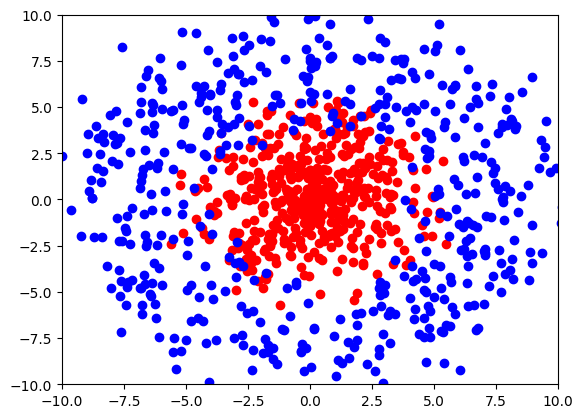

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def circle_and_ring_sampling(n, radius, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    r = np.random.uniform(0, radius / 2, half_n) + np.random.uniform(-eps, eps, half_n)
    phi = np.random.uniform(0, 2 * np.pi, half_n)
    x1[:, 0] = r * np.sin(phi)
    x1[:, 1] = r * np.cos(phi)

    x2 = np.zeros((half_n, 2))
    r = np.random.uniform(radius / 2, radius, half_n) + np.random.uniform(-eps, eps, half_n)
    phi = np.random.uniform(0, 2 * np.pi, half_n)
    x2[:, 0] = r * np.sin(phi)
    x2[:, 1] = r * np.cos(phi)

    return x1, x2


# Пример
x1, x2 = circle_and_ring_sampling(1000, 10, 1.5)

plt.scatter(x1[:, 0], x1[:, 1], color='red')
plt.scatter(x2[:, 0], x2[:, 1], color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

### Генерация выборки *XOR*:


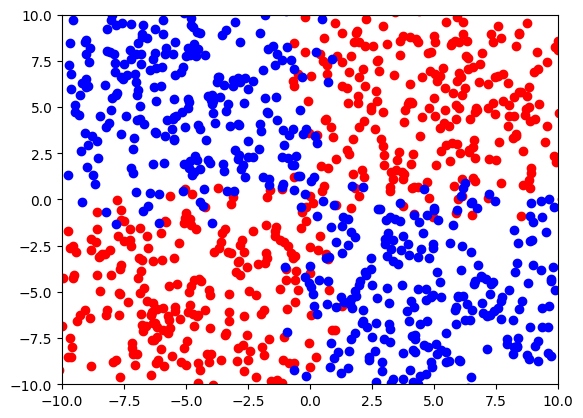

In [2]:
def xor_sampling(n, length, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    x1[:, 0] = np.concatenate((np.random.uniform(0, length, half_n // 2),
                               np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(
        -eps, eps, half_n)
    x1[:, 1] = np.concatenate((np.random.uniform(0, length, half_n // 2),
                               np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(
        -eps, eps, half_n)

    x2 = np.zeros((half_n, 2))
    x2[:, 0] = np.concatenate((np.random.uniform(0, length, half_n // 2),
                               np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(
        -eps, eps, half_n)
    x2[:, 1] = np.concatenate((np.random.uniform(-length, 0, half_n // 2),
                               np.random.uniform(0, length, half_n // 2))) + np.random.uniform(-eps,
                                                                                               eps,
                                                                                               half_n)

    return x1, x2


# Пример
x1, x2 = xor_sampling(1000, 10, 1.5)

plt.scatter(x1[:, 0], x1[:, 1], color='red')
plt.scatter(x2[:, 0], x2[:, 1], color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

### Генерация выборки *Two Circles*:


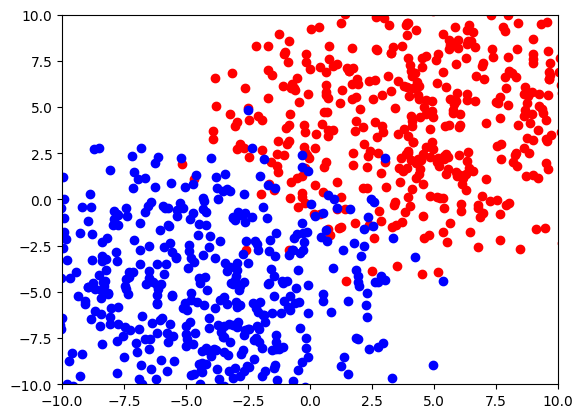

In [3]:
def two_circles_sampling(n, length, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    r1 = np.random.uniform(0, length // 2, half_n)
    phi1 = np.random.uniform(0, 2 * np.pi, half_n)
    x1[:, 0] = r1 * np.cos(phi1) + np.random.uniform(-eps, eps, half_n) + length // 2
    x1[:, 1] = r1 * np.sin(phi1) + np.random.uniform(-eps, eps, half_n) + length // 2

    x2 = np.zeros((half_n, 2))
    r2 = np.random.uniform(0, length // 2, half_n)
    phi2 = np.random.uniform(0, 2 * np.pi, half_n)
    x2[:, 0] = r2 * np.cos(phi2) + np.random.uniform(-eps, eps, half_n) - length // 2
    x2[:, 1] = r2 * np.sin(phi2) + np.random.uniform(-eps, eps, half_n) - length // 2

    return x1, x2


# Пример
x1, x2 = two_circles_sampling(1000, 10, 6)

plt.scatter(x1[:, 0], x1[:, 1], color='red')
plt.scatter(x2[:, 0], x2[:, 1], color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

### Генерация выборки *Spirale*:

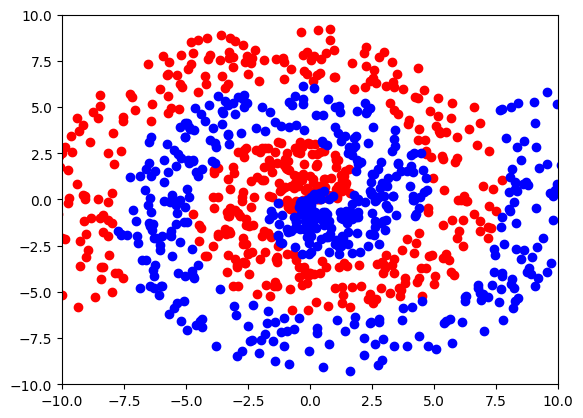

In [4]:
def spirale_sampling(n, radius, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    r = np.abs(np.random.uniform(0, radius, half_n))
    r1 = r + np.random.uniform(-eps, eps, half_n)
    phi = r
    x1[:, 0] = r1 * np.cos(phi)
    x1[:, 1] = r1 * np.sin(phi)

    x2 = np.zeros((half_n, 2))
    r = np.abs(np.random.uniform(0, radius, half_n))
    r2 = r + np.random.uniform(-eps, eps, half_n)
    phi = r + np.pi
    x2[:, 0] = r2 * np.cos(phi)
    x2[:, 1] = r2 * np.sin(phi)

    return x1, x2


# Пример
x1, x2 = spirale_sampling(1000, 10, 1.5)

plt.scatter(x1[:, 0], x1[:, 1], color='red')
plt.scatter(x2[:, 0], x2[:, 1], color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## Реализация многослойного перцептрона

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim


# Функции активации
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


def tanh(x):
    return torch.tanh(x)


def relu(x):
    return torch.maximum(torch.tensor(0.0), x)


class MultilayerPerceptron(nn.Module):
    def __init__(self, layer_dims, activation='relu'):
        super(MultilayerPerceptron, self).__init__()

        self.activation = activation  # Выбор функции активации
        self.layers = nn.ModuleList()  # Создание списка слоев

        # Создание линейных слоев с заданными размерностями
        for i in range(len(layer_dims) - 1):
            self.layers.append(nn.Linear(layer_dims[i], layer_dims[i + 1]))

    def forward(self, x):
        # Проход вперёд по слоям с применением выбранной функции активации
        for layer in self.layers[:-1]:
            if self.activation == 'sigmoid':
                x = sigmoid(layer(x))
            elif self.activation == 'tanh':
                x = tanh(layer(x))
            elif self.activation == 'relu':
                x = relu(layer(x))

        # Финальный слой без функции активации
        x = self.layers[-1](x)
        return x


    def fit(self, x_train, y_train, learning_rate=0.01, batch_size=32, epochs=1000, logs=False):
        loss = 0.0
        criterion = nn.CrossEntropyLoss()  # Функция потерь для многоклассовой классификации
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)  # Оптимизатор стохастического градиентного спуска

        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                inputs = torch.tensor(x_train[i:i + batch_size], dtype=torch.float32)
                targets = torch.tensor(y_train[i:i + batch_size], dtype=torch.long)

                optimizer.zero_grad()

                outputs = self(inputs)
                loss = criterion(outputs, targets)

                loss.backward()
                optimizer.step()

            if logs:
              print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")


    def predict(self, x):
        with torch.no_grad():
            inputs = torch.tensor(x, dtype=torch.float32)
            outputs = self(inputs)
            _, predicted = torch.max(outputs, 1)
            return predicted.numpy()

## Обучение модели на различных выборках

Функция для обучения, тестирования и вывода метрик:

In [6]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, make_scorer, accuracy_score


def fit_check_metrics(model, x, y, learning_rate=0.01, batch_size=32, epochs=1000):
    def plot_classification_result(classifier, xlim, ylim, resolution=0.005):
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], int((xlim[1] - xlim[0]) / resolution)),
                             np.linspace(ylim[0], ylim[1], int((ylim[1] - ylim[0]) / resolution)))

        grid_points = np.column_stack((xx.ravel(), yy.ravel()))
        Z_probs = classifier(torch.tensor(grid_points, dtype=torch.float32)).detach().numpy()
        Z_labels = np.argmax(Z_probs, axis=1)
        Z_labels = Z_labels.reshape(xx.shape)

        plt.contourf(xx, yy, Z_labels, cmap=plt.cm.RdYlBu, alpha=0.8)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Classification Result')

        plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k')
        plt.colorbar()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Разделение на обучающую и проверочную выборки
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

    # Обучение
    start_time = time()
    model.fit(x_train, y_train, learning_rate, batch_size, epochs)
    end_time = time()

    # Проверка
    y_pred = model.predict(x_test)

    # Вывод метрик
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Fit time: {end_time - start_time} seconds')

    # Построение графика предсказанных меток
    plot_classification_result(model, xlim=(-10, 10), ylim=(-10, 10))

    # Отображение матрицы ошибок
    ConfusionMatrixDisplay(matrix, display_labels=[0, 1]).plot(
        include_values=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

### Обучение модели на выборке *Circle And Ring*:

Accuracy: 0.92
Fit time: 22.476665019989014 seconds


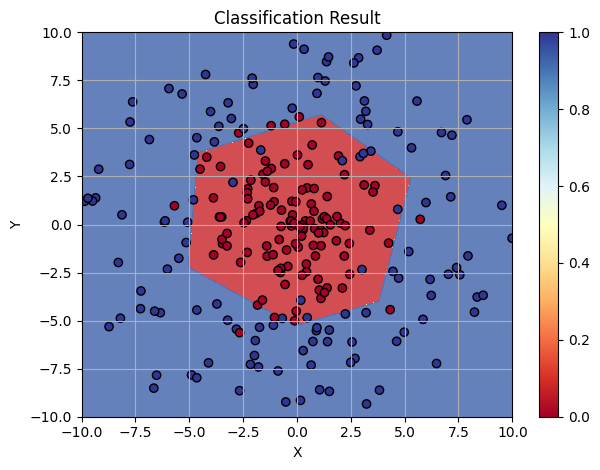

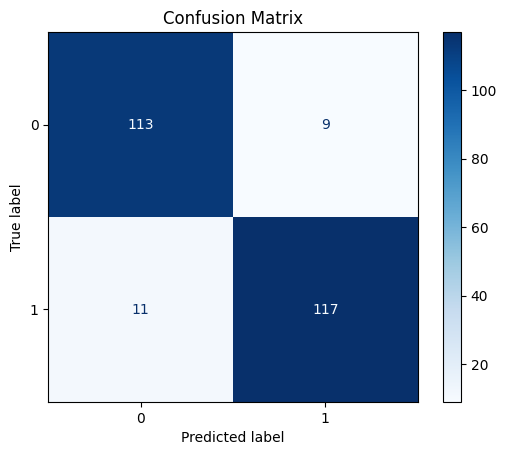

In [7]:
# Генерация выборки
N = 1000
x1, x2 = circle_and_ring_sampling(1000, 10, 1.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Создание перцептрона
model = MultilayerPerceptron([2, 5, 2], activation='relu')

fit_check_metrics(model, x, y)

### Обучение модели на выборке *XOR*:

Accuracy: 0.936
Fit time: 19.451607704162598 seconds


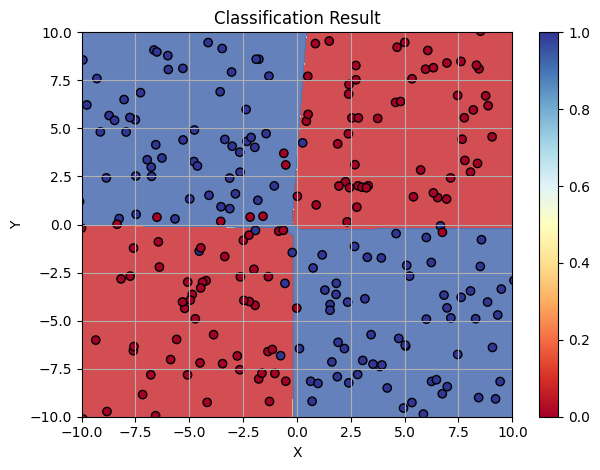

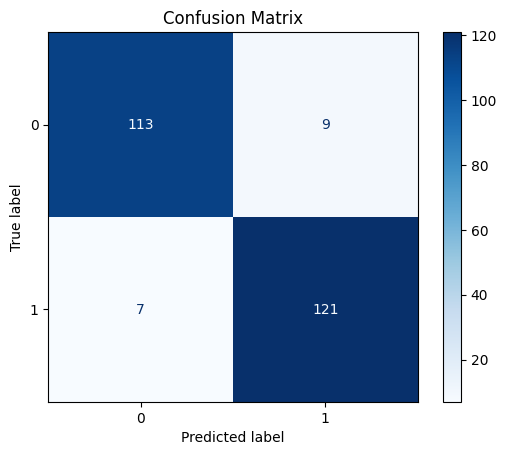

In [8]:
# Генерация выборки
N = 1000
x1, x2 = xor_sampling(1000, 10, 1.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Создание перцептрона
model = MultilayerPerceptron([2, 4, 3], activation='relu')

fit_check_metrics(model, x, y)

### Обучение модели на выборке *Two Circles*:

Accuracy: 0.992
Fit time: 13.239651918411255 seconds


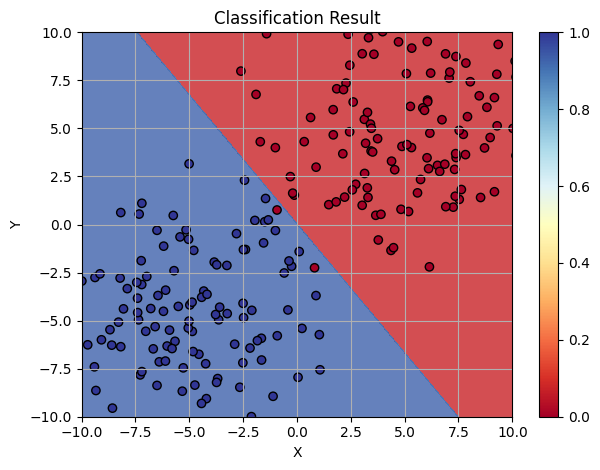

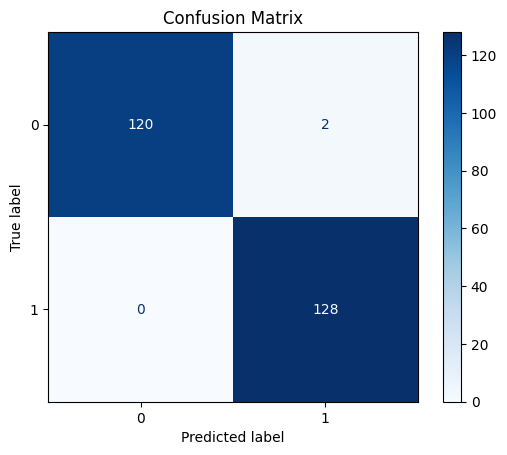

In [9]:
# Генерация выборки
N = 1000
x1, x2 = two_circles_sampling(1000, 10, 4.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Создание перцептрона
model = MultilayerPerceptron([2, 2], activation='relu')

fit_check_metrics(model, x, y)

### Обучение модели на выборке *Spirale*:

Accuracy: 0.768
Fit time: 54.784080505371094 seconds


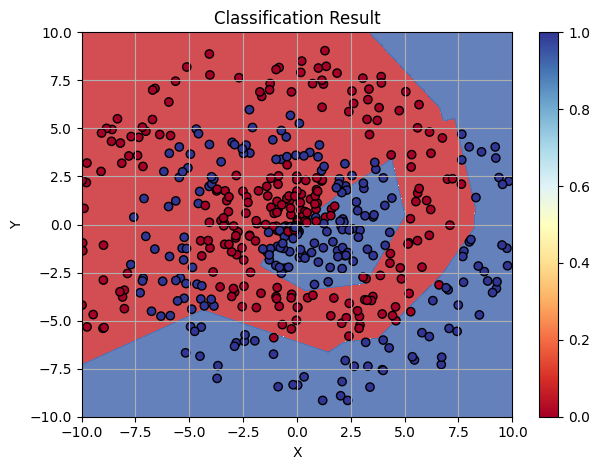

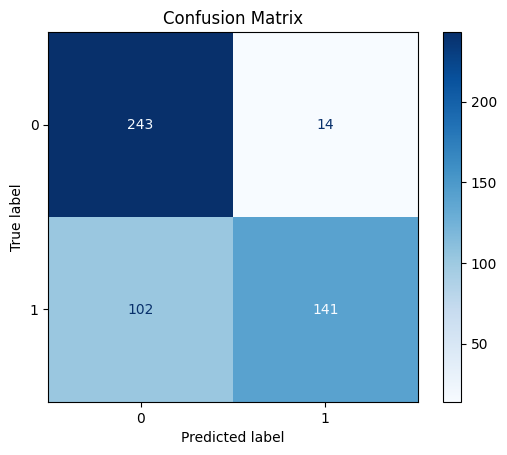

In [10]:
# Генерация выборки
N = 2000
x1, x2 = spirale_sampling(N, 10, 1.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Создание перцептрона
model = MultilayerPerceptron([2, 5, 5, 5, 5], activation='relu')

fit_check_metrics(model, x, y)

## Оценка размера выборки, достаточной для обучение классификатора с точностью > 90%

Функия для тестирования модели с различными размерами обучающей выборки:

In [11]:
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def test_model_by_sample_size(model, gen_sample):
  for n in range(100, 5000, 100):
    print(f"Test with sample size: {n}")
    model_copy = copy.deepcopy(model)
    x1, x2 = gen_sample(n)
    x = np.concatenate((x1, x2))
    y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))

    # Разделение на обучающую и проверочную выборки
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

    # Обучение
    model_copy.fit(x_train, y_train)

    # Подсчёт точности
    y_pred = model_copy.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    if accuracy >= 0.9:
      print(f"Found sample size: {n}")
      return

### Тестирование на выборке *Circle And Ring*

In [12]:
model = MultilayerPerceptron([2, 5, 2], activation='relu')
test_model_by_sample_size(model, lambda n: circle_and_ring_sampling(n, 10, 1.5))

Test with sample size: 100
Accuracy: 0.84
Test with sample size: 200
Accuracy: 0.88
Test with sample size: 300
Accuracy: 0.9333333333333333
Found sample size: 300


### Тестирование на выборке *XOR*

In [13]:
model = MultilayerPerceptron([2, 4, 2], activation='relu')
test_model_by_sample_size(model, lambda n: xor_sampling(n, 10, 1.5))

Test with sample size: 100
Accuracy: 0.88
Test with sample size: 200
Accuracy: 0.92
Found sample size: 200


### Тестирование на выборке *Two Circles*

In [14]:
model = MultilayerPerceptron([2, 2], activation='relu')
test_model_by_sample_size(model, lambda n: two_circles_sampling(n, 10, 6))

Test with sample size: 100
Accuracy: 0.96
Found sample size: 100


### Тестирование на выборке *Spirale*

In [15]:
model = MultilayerPerceptron([2, 5, 5, 5, 5, 2], activation='relu')
test_model_by_sample_size(model, lambda n: spirale_sampling(n, 10, 1.5))

Test with sample size: 100
Accuracy: 0.6
Test with sample size: 200
Accuracy: 0.58
Test with sample size: 300
Accuracy: 0.5733333333333334
Test with sample size: 400
Accuracy: 0.58
Test with sample size: 500
Accuracy: 0.664
Test with sample size: 600
Accuracy: 0.44666666666666666
Test with sample size: 700
Accuracy: 0.8171428571428572
Test with sample size: 800
Accuracy: 0.605
Test with sample size: 900
Accuracy: 0.9155555555555556
Found sample size: 900


## Кросс-валидация

Функция для кросс-валидации:

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


def cross_validate(model, x, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    accuracies = []

    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return np.mean(accuracies)

Функция для тестирования модели с разными функциями активации и разными количеством слоев:

In [17]:
def test_model_by_activation_and_layer_count(activations, layers, sample_gen):
  x, y = sample_gen()
  for activation in activations:
    for layer_dims in layers:
      print(f"Test (layer_dims={layer_dims}, activation={activation}):")
      model = MultilayerPerceptron(layer_dims=layer_dims, activation=activation)
      accuracy = cross_validate(model, x, y)
      print(f"Accuracy: {accuracy}")

### Тестирование на выборке *Circle And Ring*

In [18]:
activations = ['sigmoid', 'tanh', 'relu']
layers = [[2, 5, 2]]
def circle_and_ring_sample_gen():
  n = 300
  x1, x2 = circle_and_ring_sampling(n, 10, 1.5)
  x = np.concatenate((x1, x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  return x, y

test_model_by_activation_and_layer_count(activations, layers, circle_and_ring_sample_gen)

Test (layer_dims=[2, 5, 2], activation=sigmoid):
Accuracy: 0.8666666666666668
Test (layer_dims=[2, 5, 2], activation=tanh):
Accuracy: 0.8833333333333334
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.9099999999999999


In [19]:
activations = ['relu']
layers = [[2, 2], [2, 5, 2], [2, 5, 5, 2], [2, 5, 5, 5, 2], [2, 5, 5, 5, 5, 2]]

test_model_by_activation_and_layer_count(activations, layers, circle_and_ring_sample_gen)

Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.37
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.9199999999999999
Test (layer_dims=[2, 5, 5, 2], activation=relu):
Accuracy: 0.9366666666666668
Test (layer_dims=[2, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9433333333333334
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.93


### Тестирование на выборке *XOR*

In [20]:
activations = ['sigmoid', 'tanh', 'relu']
layers = [[2, 4, 2]]
def xor_sample_gen():
  n = 200
  x1, x2 = xor_sampling(n, 10, 1.5)
  x = np.concatenate((x1, x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  return x, y

test_model_by_activation_and_layer_count(activations, layers, xor_sample_gen)

Test (layer_dims=[2, 4, 2], activation=sigmoid):
Accuracy: 0.8899999999999999
Test (layer_dims=[2, 4, 2], activation=tanh):
Accuracy: 0.925
Test (layer_dims=[2, 4, 2], activation=relu):
Accuracy: 0.925


In [21]:
activations = ['relu']
layers = [[2, 2], [2, 5, 2], [2, 5, 5, 2], [2, 5, 5, 5, 2], [2, 5, 5, 5, 5, 2]]

test_model_by_activation_and_layer_count(activations, layers, xor_sample_gen)

Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.49000000000000005
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.905
Test (layer_dims=[2, 5, 5, 2], activation=relu):
Accuracy: 0.9049999999999999
Test (layer_dims=[2, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9099999999999999
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9100000000000001


### Тестирование на выборке *Two Circles*

In [22]:
activations = ['sigmoid', 'tanh', 'relu']
layers = [[2, 2]]
def two_circles_sample_gen():
  n = 100
  x1, x2 = two_circles_sampling(n, 10, 6)
  x = np.concatenate((x1, x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  return x, y

test_model_by_activation_and_layer_count(activations, layers, two_circles_sample_gen)

Test (layer_dims=[2, 2], activation=sigmoid):
Accuracy: 0.95
Test (layer_dims=[2, 2], activation=tanh):
Accuracy: 0.95
Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.95


In [23]:
activations = ['relu']
layers = [[2, 2], [2, 5, 2], [2, 5, 5, 2], [2, 5, 5, 5, 2], [2, 5, 5, 5, 5, 2]]

test_model_by_activation_and_layer_count(activations, layers, two_circles_sample_gen)

Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.95
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.95
Test (layer_dims=[2, 5, 5, 2], activation=relu):
Accuracy: 0.93
Test (layer_dims=[2, 5, 5, 5, 2], activation=relu):
Accuracy: 0.93
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9400000000000001


### Тестирование на выборке *Spirale*

In [24]:
activations = ['sigmoid', 'tanh', 'relu']
layers = [[2, 5, 5, 5, 5, 2]]
def spirale_sample_gen():
  n = 1100
  x1, x2 = spirale_sampling(n, 10, 1.5)
  x = np.concatenate((x1, x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  return x, y

test_model_by_activation_and_layer_count(activations, layers, spirale_sample_gen)

Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=sigmoid):
Accuracy: 0.5
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=tanh):
Accuracy: 0.7172727272727273
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.8254545454545454


In [25]:
activations = ['relu']
layers = [[2, 2], [2, 5, 2], [2, 5, 5, 2], [2, 5, 5, 5, 2], [2, 5, 5, 5, 5, 2]]

test_model_by_activation_and_layer_count(activations, layers, spirale_sample_gen)

Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.6181818181818183
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.629090909090909
Test (layer_dims=[2, 5, 5, 2], activation=relu):
Accuracy: 0.7336363636363636
Test (layer_dims=[2, 5, 5, 5, 2], activation=relu):
Accuracy: 0.85
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.8927272727272728
